# Neural Network-Practical Work3 Perceptron- Group A (Lin,Sheng-Huei)

1) DATA VISUALIZATION 

In [50]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()

In [67]:
# a) Load the data set

iris_reduced= pd.read_csv("iris_reduced.csv")
iris_reduced.head(n = 10)

,petal length (cm),petal width (cm),target
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
5,1.7,0.4,1
6,1.4,0.3,1
7,1.5,0.2,1
8,1.4,0.2,1
9,1.5,0.1,1


In [52]:
iris_reduced.shape

(150, 3)

The size of the examples is 150 and the number of features is 2.

(array([0, 1]), array([100,  50]))


(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

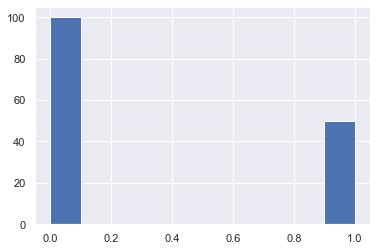

In [53]:
# b) Plot the class distribution 

class_dist = np.unique(iris_reduced["target"].values, return_counts = True)

print(class_dist)

target_dist = iris_reduced.iloc[:,2]
plt.hist(target_dist)

We have two classes "0" with 100 elements and "1" with 50 elements.

<function matplotlib.pyplot.show(*args, **kw)>

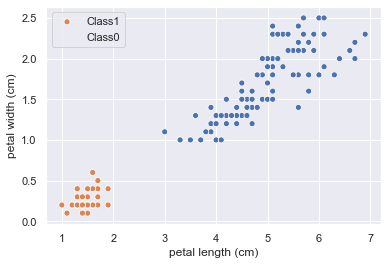

In [54]:
# c) Display a scatter plot of the data

classes = ["Class1", "Class0"]

sns.scatterplot(iris_reduced["petal length (cm)"], iris_reduced["petal width (cm)"], hue = iris_reduced["target"])
plt.legend(classes)
plt.show

2) Perceptron Algorithm

In [55]:
# a) Spliting the data

X_train, X_test, y_train, y_test = train_test_split(iris_reduced.iloc[:,0:2], iris_reduced.iloc[:,2], train_size = 0.8, random_state = 42, stratify = iris_reduced.iloc[:,2])

We have to use the stratify parameter to make sure that we have the same proportion of elements of Class0 and Class1 in the training set and the testing set.

In [56]:
# b) Test the perceptron algorithm

clf = Perceptron(max_iter = 500, tol=None)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=500, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
# c) Get the accuracy of the model

accuracy_score = clf.score(X_test, y_test)
print(accuracy_score)

1.0


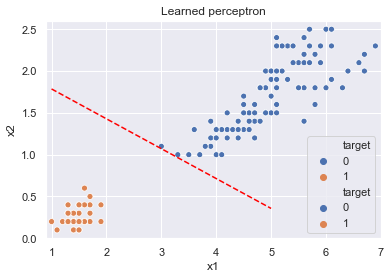

In [58]:
# d) Plot the scatter plot

def draw_line(x1, x2, a, b):
    y1 = a*x1 + b
    y2 = a*x2 + b
    plt.plot([x1,x2],[y1,y2], '--', c='red')

w0 = clf.intercept_
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
a = -(w0/w2)/(w0/w1)
b = (0, -w0/w2)
sns.scatterplot(iris_reduced.iloc[:,0], iris_reduced.iloc[:,1], hue=iris_reduced.iloc[:,2])
sns.scatterplot(X_test.iloc[:,0], X_test.iloc[:,1], hue=y_test)
draw_line(1,5, a,b)
plt.xlim([np.min(iris_reduced.iloc[:,0])-0.1,np.max(iris_reduced.iloc[:,0])+0.1])
plt.ylim([np.min(iris_reduced.iloc[:,1])-0.1,np.max(iris_reduced.iloc[:,1])+0.1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Learned perceptron')
plt.show()

3 BANANA DATASET

In [59]:
# a) Loading the banana dataset

banana = pd.read_csv("banana.csv")
banana.head()


,At1,At2,Class
0,1.140,-0.114,-1
1,-1.520,-1.150,1
2,-1.050,0.720,-1
3,-0.916,0.397,1
4,-1.090,0.437,1


In [60]:
class_dist_banana = np.unique(banana["Class"].values, return_counts = True)
print(class_dist_banana)

(array([-1,  1]), array([2924, 2376]))


In [61]:
# b) Splitting the data

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(banana.iloc[:,0:2], banana.iloc[:,2], train_size = 0.85, random_state = 42, stratify = banana.iloc[:,2])

In [62]:
# c) Fiting the perceptron

clf_b = Perceptron(max_iter = 500, tol=None)
clf_b.fit(X_train_b, y_train_b)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=500, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
accuracy_score_b = clf_b.score(X_test_b,y_test_b)
print(accuracy_score_b)

0.5962264150943396


In [68]:
# d) Fit a knn with optimal k

from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []
n_k = []

for k in np.arange(1,500,1):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_b, y_train_b)
    
    accuracy_b = knn.score(X_test_b, y_test_b)
    accuracy_scores.append(accuracy_b)
    
    n_k.append(k)

Text(0.5, 1.0, 'Evolution of accuracy according to the number of k')

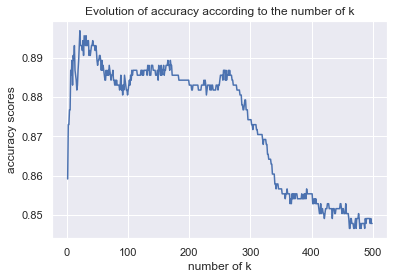

In [69]:
plt.plot(n_k, accuracy_scores)
plt.xlabel("number of k")
plt.ylabel("accuracy scores")
plt.title("Evolution of accuracy according to the number of k")

Thanks to the plot we can see that the optimal value of K is 21

In [66]:
knn_opti = KNeighborsClassifier(n_neighbors = 21)
knn_opti.fit(X_train_b, y_train_b)
    
accuracy_b_opti = knn_opti.score(X_test_b, y_test_b)
print(accuracy_b_opti)

0.8968553459119497


The best accuracy score that we can get is 89,69% with k = 21.